In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from lightkurve.lightcurve import LightCurve as LC
from lightkurve.search import search_lightcurve
from mpl_toolkits.axes_grid1 import make_axes_locatable
import batman


COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 16
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 8 #12
plt.rcParams['ytick.major.size']  = 8 #12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 6
plt.rcParams['ytick.minor.size']  = 6

plt.rcParams['axes.linewidth'] = 3
lw = 5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

edgecolor = '#05021f'
k2_ec = '#b8b4b2'

parula = np.load('/Users/arcticfox/parula_colors.npy')[np.linspace(0,160,4,dtype=int)]
parula = ['#eb9c3b', '#74BB43', '#1A48A0', '#742C64']
#parula = ['#B3240B', '#74BB43', '#0494EC', '#BC84DC']

gp_mod = np.load('/Users/arcticfox/Documents/v1298tau/tess/gp_2min.npy', 
                 allow_pickle=True).tolist()
map_soln=np.load('/Users/arcticfox/Documents/v1298tau/tess/map_soln_2min.npy', 
                 allow_pickle=True).tolist()
extras = np.load('/Users/arcticfox/Documents/v1298tau/tess/extras_2min.npy', 
                 allow_pickle=True).tolist()

planets=['c','d','b','e']
periods   = map_soln['period']#np.array([8.249147, 12.401369,  24.141445, 36.695032307689445])  
t0s = map_soln['t0']
t0s = np.append(t0s, [t0s[1]+periods[1], t0s[0]+periods[0], t0s[0]+periods[0]*2])
#t0s       = np.array([4648.53, 4645.4, 4648.1, 4648.8, 
#                      4645.4+periods[1], 4648.53+periods[0], 4648.53+periods[0]*2])
durations = np.array([4.66, 5.59, 6.42, 7.45, 5.59, 4.66, 4.66])/24.0

In [4]:
time = gp_mod['time'] + 0.0
flux = gp_mod['flux'] + 0.0
flux_err = gp_mod['flux_err'] + 0.0
model = gp_mod['gp_mod'] + 0.0
planet_models = extras['light_curves_tess'] + 0.0

4656.406767879379 4657.81116805987


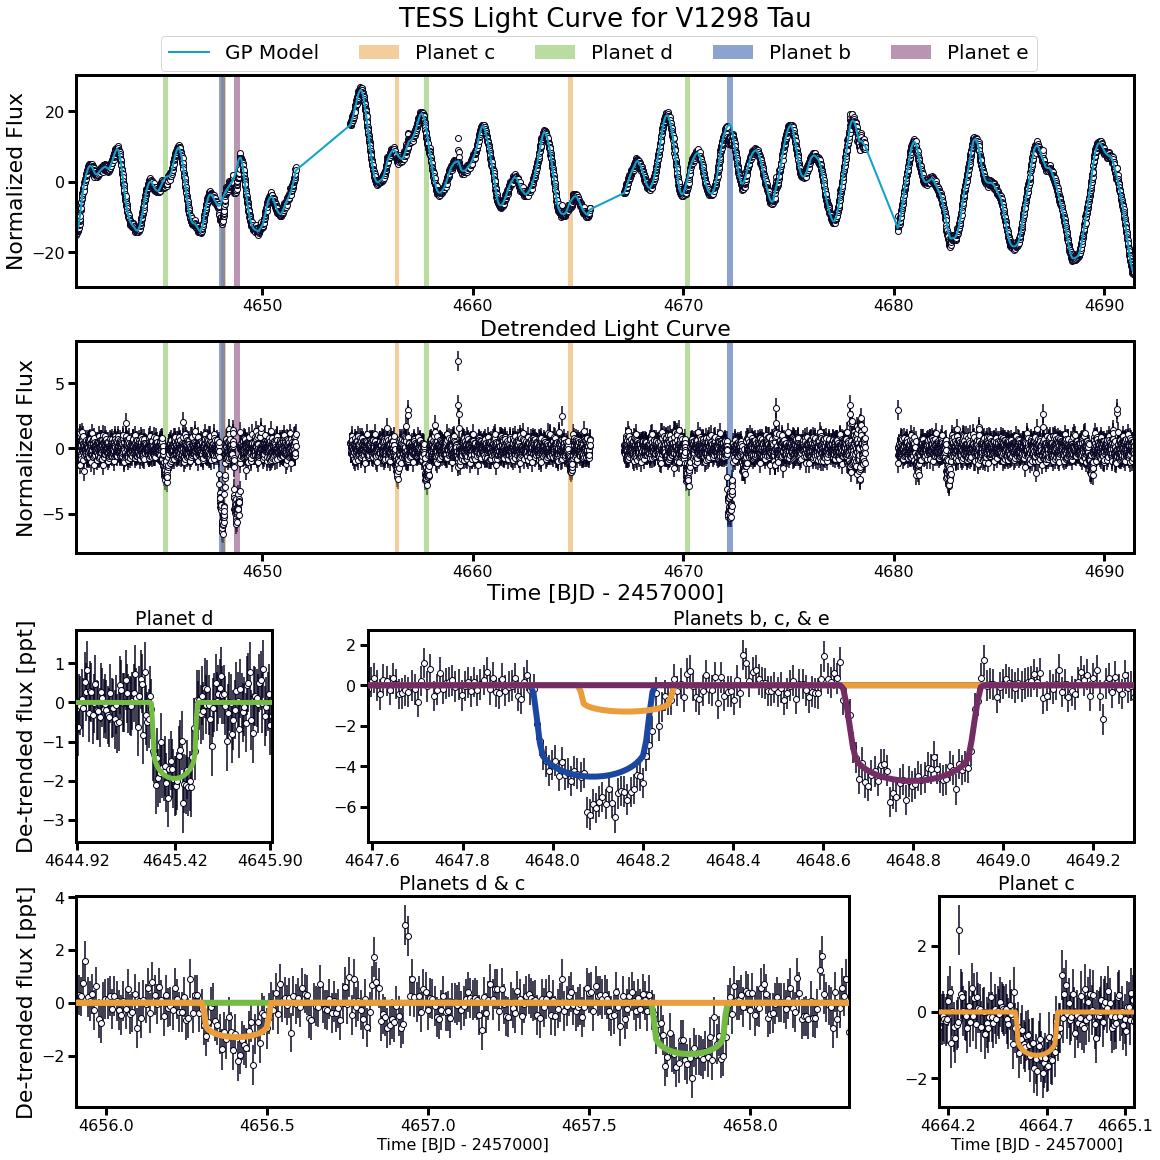

In [5]:
fig3 = plt.figure(constrained_layout=True, figsize=(16,16))
fig3.set_facecolor('w')
gs = fig3.add_gridspec(4,4)

bigger =22

## AX1
ax1 = fig3.add_subplot(gs[0, :])
ax1.set_title('TESS Light Curve for V1298 Tau', fontsize=26, y=1.2)
ax1.set_ylabel('Normalized Flux', fontsize=bigger)

ax1.errorbar(time, flux, yerr=flux_err,
             color='w', marker='o', linestyle='',
             markeredgecolor=edgecolor, zorder=1,
             ecolor=edgecolor)#, capsize=3)

ax1.plot(time, model, lw=2, color='#0fa0cc', zorder=2,
         label='GP Model')
ax1.set_xlim(time[0], time[-1])


## AX2
ax2 = fig3.add_subplot(gs[1, :])
ax2.set_title('Detrended Light Curve', fontsize=bigger)
ax2.set_ylabel('Normalized Flux', fontsize=bigger)
ax2.set_xlabel('Time [BJD - 2457000]', fontsize=bigger)

yflat =  flux-model#-0.5
ax2.errorbar(time, yflat, yerr=flux_err, 
             color='w', marker='o', linestyle='',
                 markeredgecolor=edgecolor, zorder=1,
                 ecolor=edgecolor)#, capsize=3)

for i in range(4):
    for j in range(3):
        start = t0s[i]+(periods[i]*j)-durations[i]/2
        stop = t0s[i]+(periods[i]*j)+durations[i]/2
        ax2.axvspan(start, stop,
                    ymin=flux.min(), ymax=flux.max(), 
                    color=parula[i], lw=0, alpha=0.5, linestyle='')
        if j == 1:
            ax1.axvspan(start, stop,
                        ymin=yflat.min(), ymax=yflat.max(), 
                        color=parula[i], lw=0, alpha=0.5, linestyle='',
                        label='Planet {}'.format(planets[i]))
        else:
            ax1.axvspan(start, stop,
                        ymin=yflat.min(), ymax=yflat.max(), 
                        color=parula[i], lw=0, alpha=0.5, linestyle='')

ax1.legend(bbox_to_anchor=(0.08, 1.02, 1.3, .102), loc='lower left',
           ncol=5, borderaxespad=0., fontsize=20, markerscale=6)#, mode="center", fontsize=20)

ax2.set_xlim(time[0], time[-1])

transit_axes = []

widths = [0, [1,4]]
titles = ['Planet d', 'Planets b, c, & e']
occurrence = [1, [2,0, 3]]

for i in range(len(widths)):
    if type(widths[i]) == list:
        ax3 = fig3.add_subplot(gs[2, widths[i][0]:widths[i][1]])
    else:
        ax3 = fig3.add_subplot(gs[2, widths[i]])
    ax3.set_title(titles[i])

    if type(occurrence[i]) == list:
        q = ( (time > t0s[occurrence[i][0]] - 0.5) &
              (time < t0s[occurrence[i][-1]] + 0.5) )
        
        for j in occurrence[i]:
            ax3.plot(time, planet_models[:,j],
                     c=parula[j], lw=6, zorder=3)
    else:
        q = ( (time > t0s[occurrence[i]] - 0.5) &
              (time < t0s[occurrence[i]] + 0.5) )

        ax3.plot(time, planet_models[:,occurrence[i]],
             c=parula[occurrence[i]], lw=lw, zorder=3)
    
    ax3.errorbar(time[q], yflat[q], 
                 yerr=flux_err[q],
                 color='w', marker='o', linestyle='',
                 markeredgecolor=edgecolor, zorder=1,
                 ecolor=edgecolor)#, capsize=3)#, lw=2, capsize=5, capthick=2))
    
    
    if i == 0:
        ax3.set_ylabel('De-trended flux [ppt]', fontsize=bigger)
        ax3.set_xticks(np.round([time[q][0], 
                                 time[q][int(len(time[q])/2)],
                                 time[q][-2]],2))

    ax3.set_xlim(time[q][0], 
                 time[q][-1])
    transit_axes.append(ax3)
    
    
ax4 = [fig3.add_subplot(gs[3, 0:3]), fig3.add_subplot(gs[3, 3])]
titles = ['Planets d & c', 'Planet c']
occurrence = [[5,4], 6]

for i in range(2):
    ax4[i].set_title(titles[i])
    
    if i == 0:
        ax4[i].set_ylabel('De-trended flux [ppt]', fontsize=bigger)
        
    if type(occurrence[i]) == list:
        print(t0s[occurrence[i][0]], t0s[occurrence[i][-1]])
        q = ( (time > t0s[occurrence[i][0]] - 0.5) &
              (time < t0s[occurrence[i][-1]] + 0.5) )
        
        for j in occurrence[i]:
            ax4[i].plot(time, planet_models[:,j-4],
                        c=parula[j-4], lw=6, zorder=3)
            
    else:
        q = ( (time > t0s[occurrence[i]] - 0.5) &
              (time < t0s[occurrence[i]] + 0.5) )

        ax4[i].plot(time, planet_models[:,occurrence[i]-6],
                    c=parula[occurrence[i]-6], lw=lw, zorder=3)
        
    ax4[i].errorbar(time[q], yflat[q], 
                     yerr=flux_err[q],
                     color='w', marker='o', linestyle='',
                     markeredgecolor=edgecolor, zorder=1,
                     ecolor=edgecolor)#, capsize=3)
        
    ax4[i].set_xlabel('Time [BJD - 2457000]')
    ax4[i].set_xlim(time[q][0], 
                        time[q][-1])
    
    if i == 1:
        ax4[i].set_xticks(np.round([time[q][0], 
                                    time[q][int(len(time[q])/2)],
                                    time[q][-1]],1))
    transit_axes.append(ax4[i])
    
all_axes = transit_axes
all_axes.append(ax1)
all_axes.append(ax2)
for ax in all_axes:
    ax.set_rasterized(True)
    
#plt.savefig('lightcurve.pdf', rasterize=True, bbox_inches='tight', dpi=300)

## Comparing to K2

In [4]:
planets=['c','d','b','e']
durations = np.array([4.66, 5.59, 6.42, 7.45])/24.0

t0s_k2   = np.array([2231.281202, 2239.400529, 2234.046461, 2263.6229])
periods_k2 = np.array([8.249147, 12.401369,  24.141445, 36.695032307689445])

k2 = search_lightcurve(target='V1298 Tau', mission='K2',
                       author='EVEREST').download_all().stitch()

from scipy.interpolate import interp1d

In [5]:
def setup_batman(time, args, mission='K2', index=0):
    params = batman.TransitParams()
    if mission == 'K2':
        params.t0 = args[0]                     #time of inferior conjunction
        params.per = args[1]                        #orbital period
    elif mission=='phase':
        params.t0 = 0 + 0. 
        params.per = args[1]
    else:
        params.t0 = t0s[index]
        params.per= periods[index]
    params.rp = args[2]                        #planet radius (in units of stellar radii)
    params.a = args[3]                        #semi-major axis (in units of stellar radii)
    params.inc = args[4]                       #orbital inclination (in degrees)
    params.ecc = args[5]                        #eccentricity
    params.w = args[6]                         #longitude of periastron (in degrees)
    params.u = [0.46, 0.11]                #limb darkening coefficients [u1, u2]
    params.limb_dark = "quadratic"       #limb darkening model
    
    m = batman.TransitModel(params, time)    #initializes model
    flux = m.light_curve(params)          #calculates light curve
    return (flux*1e3)-1e3

In [6]:
c = [2231.281202, 8.249147, 0.0381, 13.19, 88.49, 0, 92]
d = [2239.400529, 12.401369,  0.0436, 17.31, 89.04, 0, 88]
b = [2234.046461, 24.141445, 0.07, 27.0, 89, 0, 85]
e = [2263.6229, 60, 0.0611, 51, 89.4, 0, 91]

batman_params=[c,d,b,e]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later


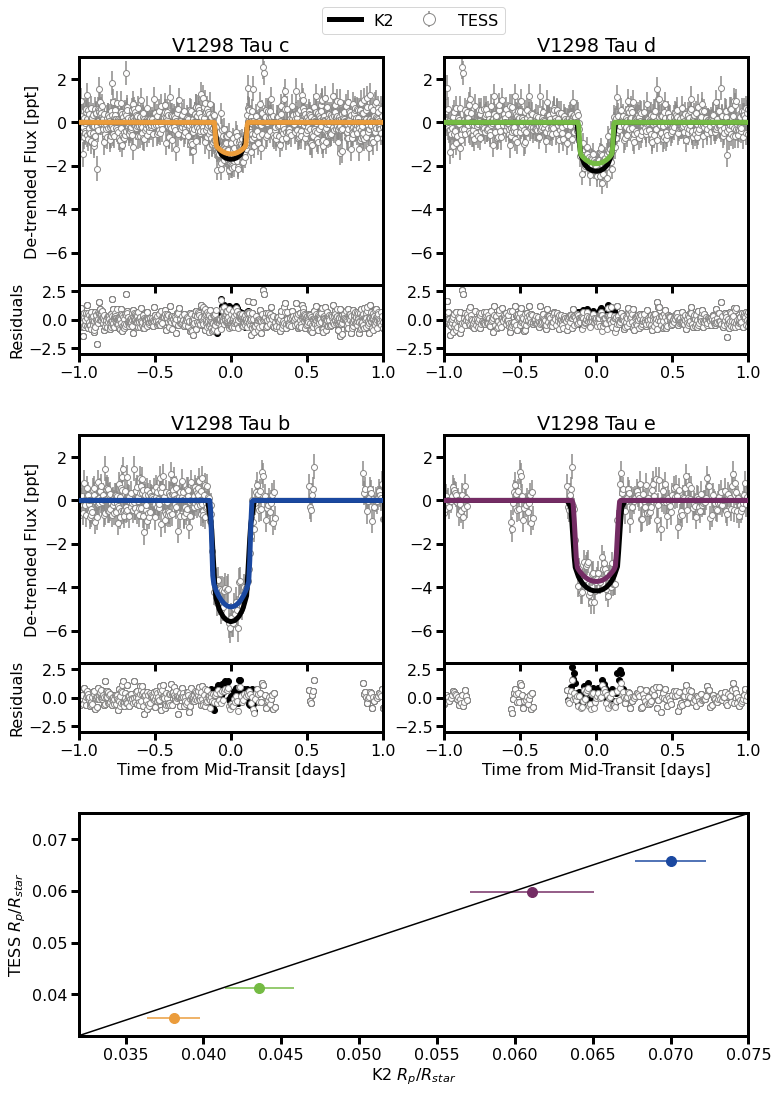

In [33]:
#fig, ((ax_c, ax_d), (ax_b, ax_e)) = plt.subplots(ncols=2, nrows=2,
#                                                 constrained_layout=True, 
#                                                 figsize=(12,12))#, sharex=True)
fig = plt.figure(constrained_layout=True, figsize=(12,18))
fig.set_facecolor('w')
gs = fig.add_gridspec(3,2, height_ratios=[2,2,1.5])



fig.set_facecolor('w')
axes = [fig.add_subplot(gs[0, 0]),
        fig.add_subplot(gs[0, 1]), 
        fig.add_subplot(gs[1, 0]), 
        fig.add_subplot(gs[1, 1])]
last = fig.add_subplot(gs[2, :])

k2_ec = '#8a8988'

for i in range(4):
    axes[i].set_title('V1298 Tau {}'.format(planets[i]))
    
    divider = make_axes_locatable(axes[i])
    rax = divider.append_axes("bottom", size='30%', pad=0)
    axes[i].figure.add_axes(rax)
    
    mask_inds = np.delete(np.arange(0,4,1), i)
    q = np.nansum(planet_models[:,mask_inds], axis=1) >= 0
    
    lk = LC(time=time[q], 
            flux=flux[q]-model[q],
            flux_err=flux_err[q]).fold(epoch_time=map_soln['t0'][i], 
                                              period=map_soln['period'][i])
    
    md = LC(time=time[q], 
                flux=planet_models[:,i][q],#-tab['star_model'][q],
                flux_err=flux_err[q]).fold(epoch_time=map_soln['t0'][i], 
                                                  period=map_soln['period'][i])
    
    axes[i].errorbar(lk.time.value,
                     lk.flux.value, yerr=lk.flux_err.value,
                     marker='o', color='w', markeredgecolor=k2_ec,
                     zorder=1, label='TESS', ecolor=k2_ec, linestyle='')
    
    axes[i].plot(md.time.value,
                 md.flux.value, c=parula[i],
                 zorder=3, lw=lw)
    
    #mask_inds = np.delete(np.arange(0,4,1), i)
    #q = np.nansum(planet_models_k2[:,mask_inds], axis=1) >= -0.1
    
    phase = np.linspace(-40,40,len(lk.time.value))
    k2_model = setup_batman(phase, batman_params[i], mission='phase')
    interp = interp1d(phase, k2_model)
    lkk2 = LC(time=lk.time.value,
              flux=interp(lk.time.value))
              #.fold(epoch_time=batman_params[i][0],  period=batman_params[i][1])
    
    axes[i].plot(lkk2.time.value,
                 lkk2.flux.value,
                 color='k',
                 zorder=2, label='K2', lw=lw)

    axes[i].set_xticks(np.arange(-1,1.5,0.5))
    rax.set_xticks(np.arange(-1,1.5,0.5))
    axes[i].set_xticklabels([])
    
    rax.plot(lk.time.value, 
             lk.flux.value-md.flux.value, 'wo', 
             markeredgecolor=k2_ec)#, zorder=2)
    
    rax.plot(lk.time.value, 
             lk.flux.value-lkk2.flux.value, 'ko', zorder=1)
    
    rax.set_xticks(np.arange(-1,1.5,0.5))
    rax.set_ylim(-3,3)
    
    if i == 0:
        axes[i].legend(bbox_to_anchor=(0.8, 1.1, 0.6, .102), loc='lower left',
                       ncol=2, mode="expand", borderaxespad=0.)
        
    if i == 0 or i == 2:
        axes[i].set_ylabel('De-trended Flux [ppt]')
        rax.set_ylabel('Residuals')
    if i >= 2:
        rax.set_xlabel('Time from Mid-Transit [days]')
    
    
    axes[i].set_xlim(-1,1)
    rax.set_xlim(-1,1)
    axes[i].set_ylim(-7.5,3)
    axes[i].set_rasterized(True)
    
k2errs = [0.0017, 0.0022, 0.0023, 0.004]
for i, rp in enumerate([0.0381, 0.0436, 0.07, 0.0611]):
    last.errorbar(rp, map_soln['ror_tess'][i], 
                  xerr=k2errs[i],
                  marker='o', color=parula[i], ms=10)
last.plot(np.linspace(0,1,10), np.linspace(0,1,10), 'k')
last.set_xlim(0.032, 0.075)
last.set_ylim(0.032, 0.075)
last.set_xlabel('K2 $R_p/R_{star}$')
last.set_ylabel('TESS $R_p/R_{star}$')
    
plt.subplots_adjust(hspace=0.3)
plt.savefig('folded_compare.pdf', rasterize=True, dpi=250,
            bbox_inches='tight')

In [20]:
map_soln['r_pl_rade']

array([ 5.42125171,  6.30556893, 10.07805485,  9.1754653 ])